In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Optional: display plots inline
%matplotlib inline


Image shape: (360, 360)


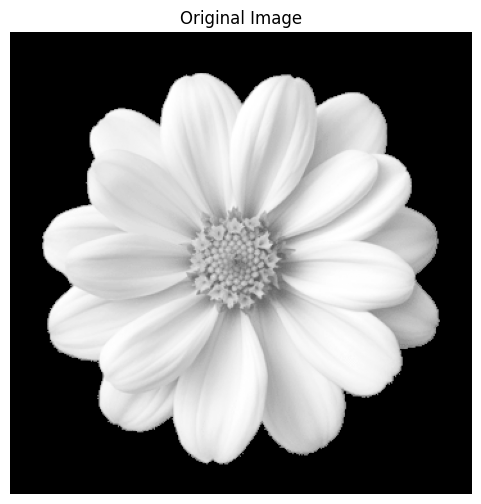

In [2]:
# 1. Load image (replace 'image.png' with your image path)
img = plt.imread('Flower.png')  # Loads as NumPy array

# If the image is RGB, convert to grayscale
if img.ndim == 3:
    img = np.mean(img, axis=2)  # Average the 3 color channels

print("Image shape:", img.shape)

# Display original image
plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()


In [3]:
# 2. Apply Singular Value Decomposition
U, S, V_T = np.linalg.svd(img, full_matrices=False)

print("Shapes:")
print("U:", U.shape)
print("S:", S.shape)
print("V_T:", V_T.shape)


Shapes:
U: (360, 360)
S: (360,)
V_T: (360, 360)


In [4]:
# 3. Choose number of components for compression
k = int(0.1 * len(S))  # Use top 10% of singular values
print(f"Using top {k} singular values for reconstruction")

# Reconstruct the compressed image
S_reduced = np.diag(S[:k])
img_compressed = U[:, :k] @ S_reduced @ V_T[:k, :]

# Clip values to valid range (0-1 for float images)
img_compressed = np.clip(img_compressed, 0, 1)


Using top 36 singular values for reconstruction


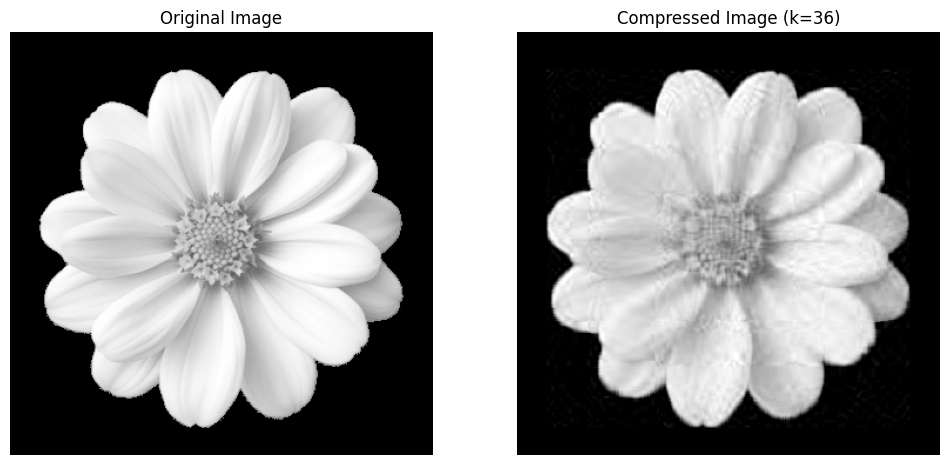

In [5]:
# 4. Display side-by-side comparison
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_compressed, cmap='gray')
plt.title(f'Compressed Image (k={k})')
plt.axis('off')

plt.show()
